In [2]:
from src.models.dcca import DeepCCA
from src.utils.embeddings import retrieve_all_embeds
from src.utils.files import save_as_pickle
from tensorflow import keras

In [12]:
model_path = "data/models/custom"
embed = retrieve_all_embeds([("data/features/use.pkl.train", "data/features/xception.pkl.train","data/features/xception.pkl.train"), 
                             ("data/features/use.pkl.dev","data/features/xception.pkl.dev", "data/features/xception.pkl.train"),
                             ("data/features/use.pkl.test", "data/features/xception.pkl.test", "data/features/xception.pkl.train")])
X1_train, X1_dev, X1_test = embed["text only"]
X2_train, X2_dev, X2_test = embed["image only"]
outdim = 100
layers = [1000, 1000, 1000, outdim]
l2 = 1e-5
lr = 1e-3
epochs = 100
batch_size = 800
use_all_singular_values = True

In [13]:
dcca = DeepCCA(X1_train.shape[1], X2_train.shape[1], layers, l2, lr, outdim, use_all_singular_values, model_path)

In [14]:
dcca.train(X1_train, X2_train, X1_dev, X2_dev, batch_size, epochs)

Train on 6999 samples, validate on 1000 samples
Epoch 1/100
6400/6999 [==========================>...] - ETA: 11s - loss: -0.0810
Epoch 00001: val_loss improved from inf to -0.26685, saving model to data/models/custom/dcca_1
6999/6999 [==============================] - 133s 19ms/sample - loss: -0.0944 - val_loss: -0.2669
Epoch 2/100
6400/6999 [==========================>...] - ETA: 11s - loss: -0.2954
Epoch 00002: val_loss improved from -0.26685 to -0.47460, saving model to data/models/custom/dcca_2
6999/6999 [==============================] - 140s 20ms/sample - loss: -0.3086 - val_loss: -0.4746
Epoch 3/100
6400/6999 [==========================>...] - ETA: 11s - loss: -0.4961
Epoch 00003: val_loss improved from -0.47460 to -0.64136, saving model to data/models/custom/dcca_3
6999/6999 [==============================] - 142s 20ms/sample - loss: -0.5059 - val_loss: -0.6414
Epoch 4/100
6400/6999 [==========================>...] - ETA: 13s - loss: -0.6966
Epoch 00004: val_loss improved from

Epoch 30/100
6400/6999 [==========================>...] - ETA: 11s - loss: -2.8708
Epoch 00030: val_loss improved from -2.67789 to -2.71127, saving model to data/models/custom/dcca_30
6999/6999 [==============================] - 141s 20ms/sample - loss: -2.8902 - val_loss: -2.7113
Epoch 31/100
6400/6999 [==========================>...] - ETA: 11s - loss: -2.9004
Epoch 00031: val_loss improved from -2.71127 to -2.73358, saving model to data/models/custom/dcca_31
6999/6999 [==============================] - 141s 20ms/sample - loss: -2.9259 - val_loss: -2.7336
Epoch 32/100
6400/6999 [==========================>...] - ETA: 11s - loss: -2.9217
Epoch 00032: val_loss improved from -2.73358 to -2.75668, saving model to data/models/custom/dcca_32
6999/6999 [==============================] - 141s 20ms/sample - loss: -2.9466 - val_loss: -2.7567
Epoch 33/100
6400/6999 [==========================>...] - ETA: 11s - loss: -2.9514
Epoch 00033: val_loss improved from -2.75668 to -2.78391, saving model 

Epoch 62/100
6400/6999 [==========================>...] - ETA: 11s - loss: -3.3439
Epoch 00062: val_loss did not improve from -2.91914
6999/6999 [==============================] - 139s 20ms/sample - loss: -3.3666 - val_loss: -2.9168
Epoch 63/100
6400/6999 [==========================>...] - ETA: 11s - loss: -3.3763
Epoch 00063: val_loss did not improve from -2.91914
6999/6999 [==============================] - 138s 20ms/sample - loss: -3.3928 - val_loss: -2.9134
Epoch 64/100
6400/6999 [==========================>...] - ETA: 11s - loss: -3.3774
Epoch 00064: val_loss did not improve from -2.91914
6999/6999 [==============================] - 138s 20ms/sample - loss: -3.3924 - val_loss: -2.9107
Epoch 65/100
6400/6999 [==========================>...] - ETA: 11s - loss: -3.3759
Epoch 00065: val_loss did not improve from -2.91914
6999/6999 [==============================] - 139s 20ms/sample - loss: -3.3935 - val_loss: -2.9144
Epoch 66/100
6400/6999 [==========================>...] - ETA: 11s -

In [15]:
dcca.model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 1000)         513000      input_5[0][0]                    
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 1000)         1001000     input_6[0][0]                    
____________________________________________________________________________________________

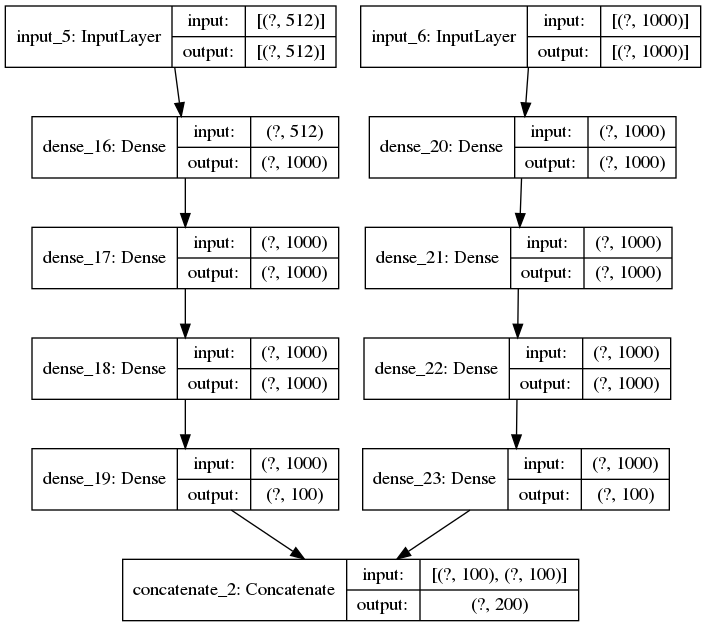

In [16]:
keras.utils.plot_model(dcca.model, "data/deepcca_100.png", show_shapes=True)

In [17]:
dev_res = dcca.test(X1_dev, X2_dev, batch_size)

1000/1000 [==============================] - 0s 84us/sample - loss: -2.9340
loss on test data: -2.9340131759643553


In [18]:
cca_embeds_test = dcca.predict(X1_test, X2_test, batch_size)
save_as_pickle(cca_embeds_test, "data/features/dcca_100.pkl.test")

Predicted values: [[-2.0845013  -2.0377002  -0.6380769  ... -3.9141338   0.1961003
   0.33648792]
 [-2.0658612  -1.7812701  -0.63476276 ... -3.9853077   0.19103187
   0.32380345]
 [-1.912731   -1.7850322  -0.75472426 ... -3.8741024   0.16358668
   0.30541688]
 ...
 [-2.0176413  -2.0028083  -0.700591   ... -4.075729    0.2794094
   0.21908285]
 [-1.9901239  -1.848111   -0.7369772  ... -3.9008055   0.3231579
   0.30243787]
 [-2.1874504  -1.9546354  -0.731083   ... -3.8806643   0.2112217
   0.2495429 ]]


In [19]:
cca_embeds_dev = dcca.predict(X1_dev, X2_dev, batch_size)
save_as_pickle(cca_embeds_dev, "data/features/dcca_100.pkl.dev")

Predicted values: [[-2.0447614  -1.9490434  -0.71817696 ... -4.1274915   0.2130714
   0.11159658]
 [-2.1068945  -1.8684129  -0.7273909  ... -3.929432    0.24544883
   0.30650038]
 [-1.9159169  -1.9721435  -0.630051   ... -4.0256524   0.17189127
   0.3192068 ]
 ...
 [-2.109991   -1.8417424  -0.68724346 ... -4.0292344   0.1215679
   0.22378291]
 [-1.9114866  -1.8854376  -0.9579092  ... -3.9161777   0.25193757
   0.3508902 ]
 [-2.1357327  -1.9038812  -0.70276964 ... -3.9015183   0.11447352
   0.31980148]]


In [20]:
cca_embeds_train = dcca.predict(X1_train, X2_train, batch_size)
save_as_pickle(cca_embeds_train, "data/features/dcca_100.pkl.train")

Predicted values: [[-1.7807628  -1.8802344  -0.6725712  ... -4.1274915   0.2130714
   0.11159658]
 [-2.041233   -2.0171697  -0.6724101  ... -3.933693    0.09487456
   0.3329224 ]
 [-1.8435092  -1.9535917  -0.86216605 ... -3.9453328   0.19675803
   0.33588347]
 ...
 [-1.9882988  -2.2201853  -0.9096664  ... -4.1230135   0.29623127
   0.26310912]
 [-2.171113   -1.709474   -0.48662308 ... -3.928222   -0.06943148
   0.02581691]
 [-1.9644637  -1.9233071  -0.66464233 ... -3.9146166   0.2171219
   0.29429576]]
